In [2]:
!pip install reportlab

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 325.1 kB/s eta 0:00:06
   - -------------------------------------- 0.1/2.0 MB 465.5 kB/s eta 0:00:05
   ------- -------------------------------- 0.4/2.0 MB 2.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/2.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 7.8 MB/s eta 0:00:00


Total jobs fetched: 94


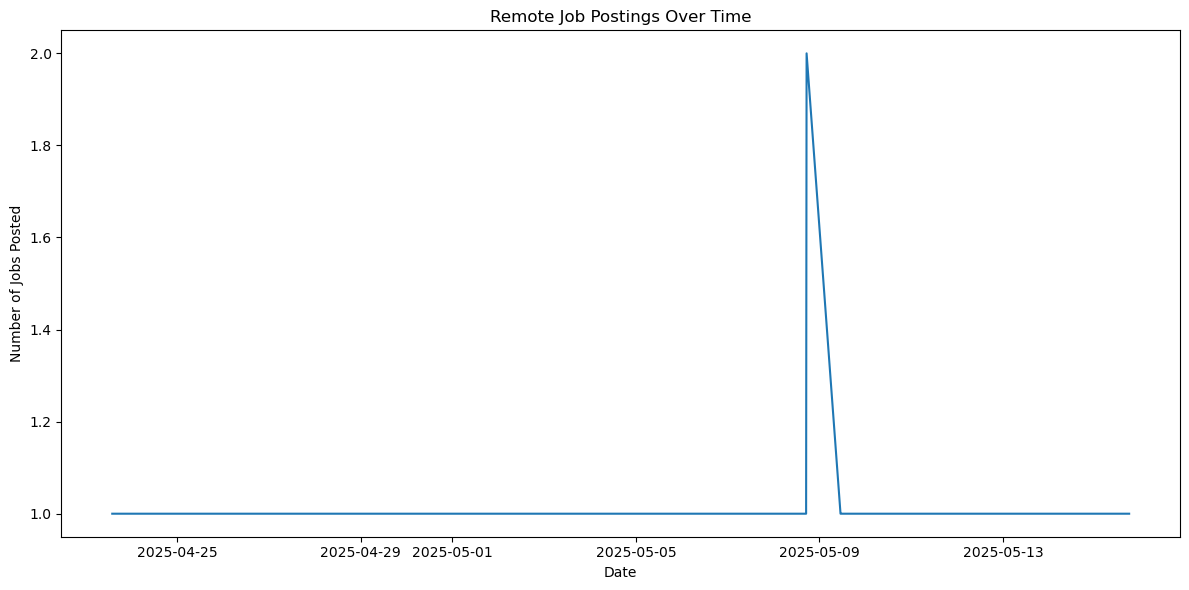

C:\Users\Mahmoud Gobran\AppData\Local\Temp\ipykernel_19296\4051096752.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


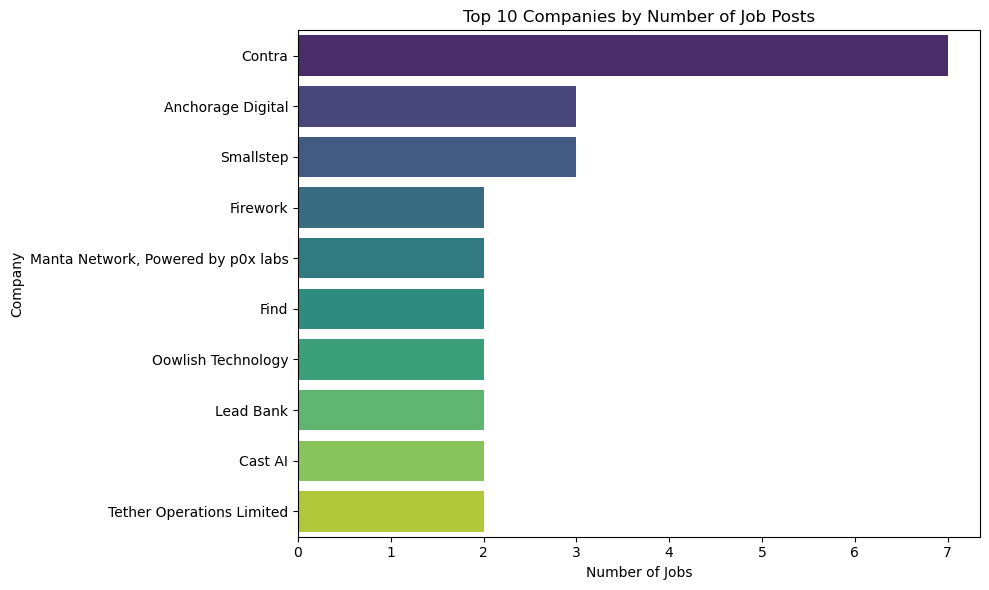

C:\Users\Mahmoud Gobran\AppData\Local\Temp\ipykernel_19296\4051096752.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma')


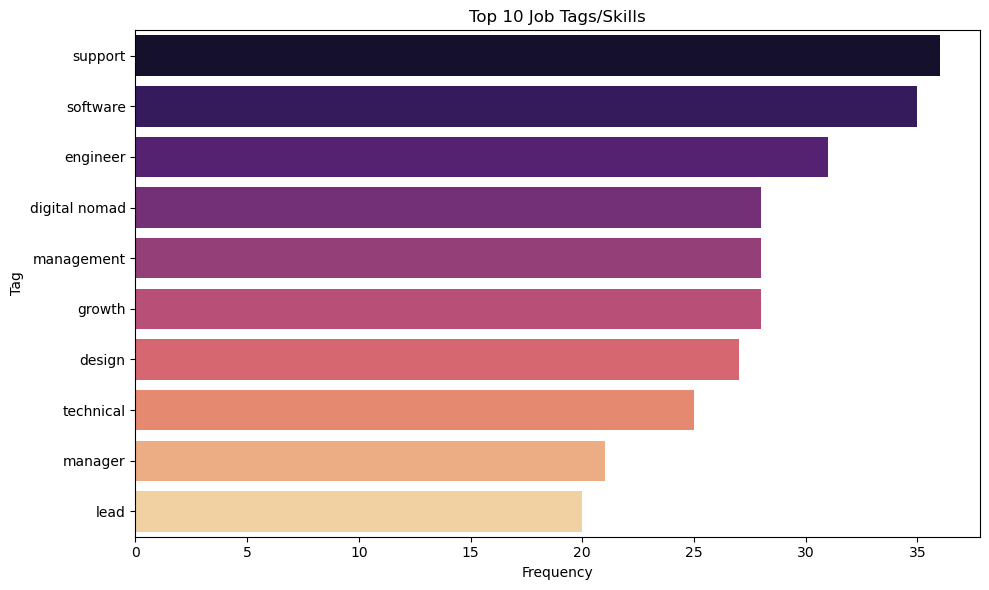

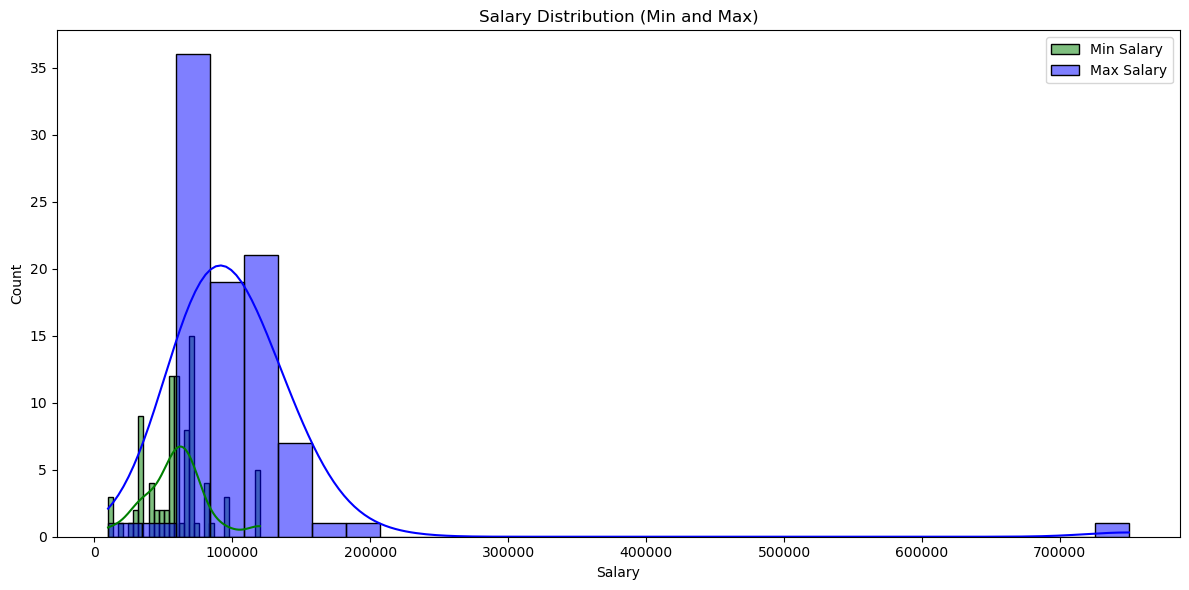

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get job data from RemoteOK API
url = "https://remoteok.com/api"
response = requests.get(url)
data = response.json()

# Step 2: Convert to DataFrame and clean
jobs = pd.DataFrame(data[1:])  # skip metadata

# Keep relevant columns, avoid non-existing ones
columns_to_keep = [
    'date', 'company', 'position', 'location', 'tags', 
    'salary_min', 'salary_max', 'url'
]
jobs_cleaned = jobs[columns_to_keep].copy()

# Step 3: Convert date and salary columns
jobs_cleaned['date'] = pd.to_datetime(jobs_cleaned['date'], errors='coerce')
jobs_cleaned['salary_min'] = pd.to_numeric(jobs_cleaned['salary_min'], errors='coerce')
jobs_cleaned['salary_max'] = pd.to_numeric(jobs_cleaned['salary_max'], errors='coerce')

# Step 4: Basic stats
print("Total jobs fetched:", len(jobs_cleaned))

# Step 5: Jobs posted over time
jobs_per_day = jobs_cleaned.groupby('date').size().reset_index(name='job_count')

plt.figure(figsize=(12,6))
sns.lineplot(data=jobs_per_day, x='date', y='job_count')
plt.title("Remote Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs Posted")
plt.tight_layout()
plt.show()  # Force plot to appear in VS Code

# Step 6: Top companies by number of job posts
top_companies = jobs_cleaned['company'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title("Top 10 Companies by Number of Job Posts")
plt.xlabel("Number of Jobs")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# Step 7: Most common tags/skills
all_tags = jobs_cleaned['tags'].dropna().explode()
top_tags = all_tags.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma')
plt.title("Top 10 Job Tags/Skills")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()

# Step 8: Salary distribution (cleaning out zeros and NaNs)
salary_data = jobs_cleaned[['salary_min', 'salary_max']].dropna()
salary_data = salary_data[(salary_data['salary_min'] > 0) & (salary_data['salary_max'] > 0)]

plt.figure(figsize=(12,6))
sns.histplot(salary_data['salary_min'], bins=30, kde=True, color='green', label='Min Salary')
sns.histplot(salary_data['salary_max'], bins=30, kde=True, color='blue', label='Max Salary')
plt.title("Salary Distribution (Min and Max)")
plt.xlabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
print("Shape of cleaned data (rows, columns):", jobs_cleaned.shape)


NameError: name 'jobs_cleaned' is not defined